<a href="https://colab.research.google.com/github/nikeshgamal24/Medical-Insurance-Prediction-Project/blob/main/Medical_Insurance_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
## necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [104]:
data = pd.read_csv("medical_insurance.csv")

In [105]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [106]:
## check for null values
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [107]:
## check for the duplicated records
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2767,True
2768,True
2769,True
2770,True


In [108]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.590,0,no,northwest,1639.56310
1338,23,male,34.400,0,no,southwest,1826.84300
1339,56,female,39.820,0,no,southeast,11090.71780
1340,27,male,42.130,0,yes,southeast,39611.75770
1341,19,male,24.600,1,no,southwest,1837.23700
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [109]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [111]:
for col in data.columns:
  print(f"Column Name: {col}")
  print(f"Unique Values: {len(data[col].unique())}")
  print("--------------------------")

Column Name: age
Unique Values: 47
--------------------------
Column Name: sex
Unique Values: 2
--------------------------
Column Name: bmi
Unique Values: 548
--------------------------
Column Name: children
Unique Values: 6
--------------------------
Column Name: smoker
Unique Values: 2
--------------------------
Column Name: region
Unique Values: 4
--------------------------
Column Name: charges
Unique Values: 1337
--------------------------


In [112]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.590,0,no,northwest,1639.56310
1338,23,male,34.400,0,no,southwest,1826.84300
1339,56,female,39.820,0,no,southeast,11090.71780
1340,27,male,42.130,0,yes,southeast,39611.75770
1341,19,male,24.600,1,no,southwest,1837.23700
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [113]:
data.shape

(2772, 7)

In [114]:
data.drop_duplicates(keep="first",inplace=True)

In [115]:
data.shape

(1337, 7)

In [116]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [117]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


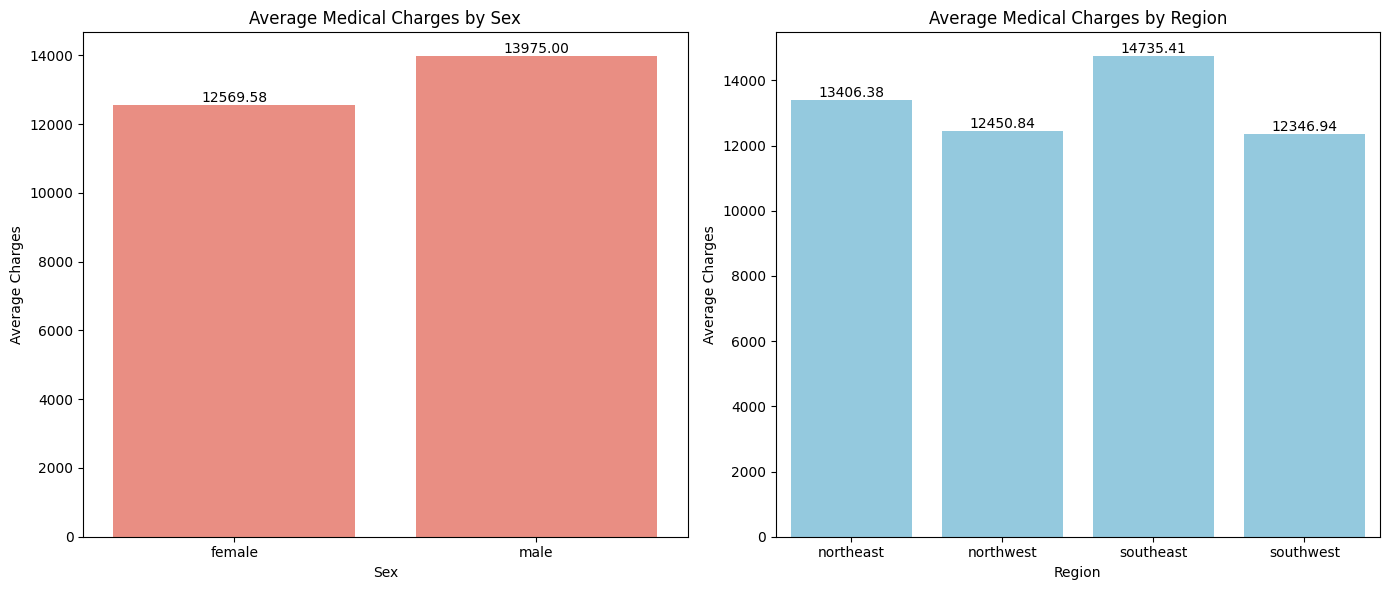

In [118]:
import seaborn as sns

## calucate the average charges based on particular feature
avg_charges_by_sex = data.groupby("sex")["charges"].mean().reset_index()
avg_charges_by_region = data.groupby("region")["charges"].mean().reset_index()

# Create subplots: 1 row, 2 columns to accommodate the two remaining plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # Adjusted figsize for 1x2 layout

# Line plot for average charges by sex (left plot)
# Now accessed directly as axes[0] in a single-row subplot
sns.barplot(ax=axes[0], x='sex', y='charges', data=avg_charges_by_sex, color='salmon')
axes[0].set_title('Average Medical Charges by Sex')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Average Charges')

# Add value labels on bars
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f')

# Line plot for average charges by BMI (right plot)
# Now accessed directly as axes[1] in a single-row subplot
sns.barplot(ax=axes[1], x='region', y='charges', data=avg_charges_by_region, color='skyblue')
axes[1].set_title('Average Medical Charges by Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Average Charges')

# Add value labels on bars
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f')

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Display the plots
plt.show()


In [119]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


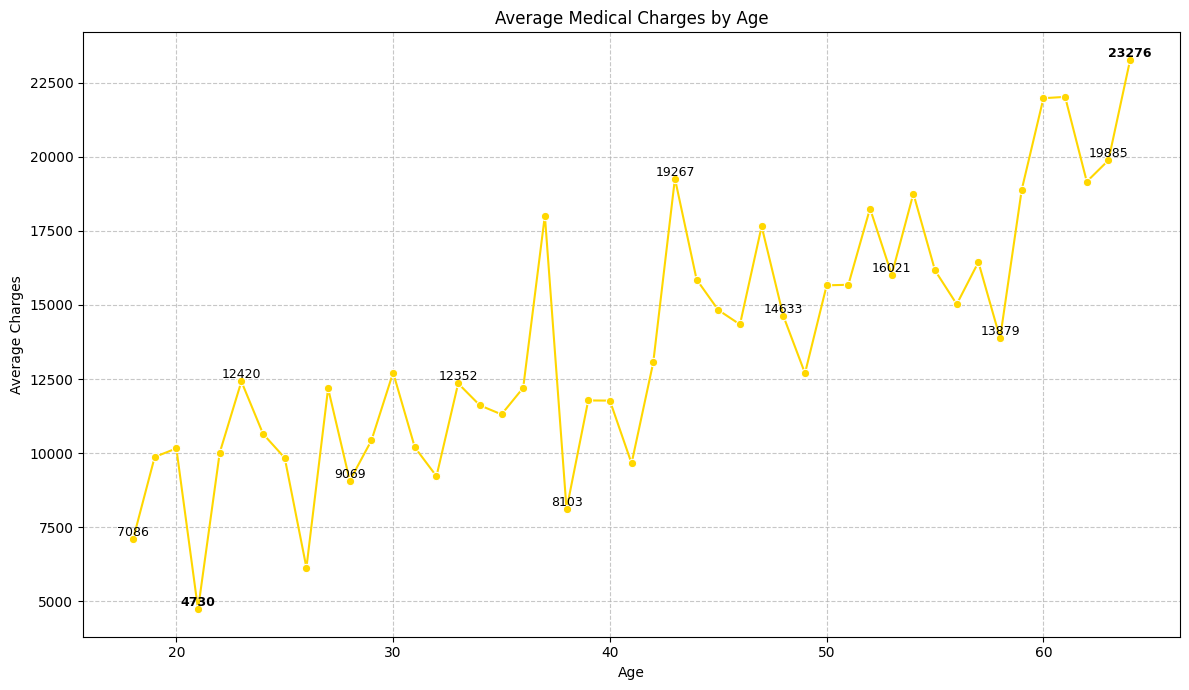

In [120]:


# Calculate the average medical charges based on age
avg_charges_by_age = data.groupby("age")["charges"].mean().reset_index()

# Create a single line plot for average medical charges by age
# We create a new figure and axes for this plot
plt.figure(figsize=(12, 7)) # Increased figure size for better label visibility
ax = sns.lineplot(x="age", y="charges", data=avg_charges_by_age, color="gold", marker='o')

# Set appropriate title and labels for the plot using the 'ax' object
ax.set_title('Average Medical Charges by Age')
ax.set_xlabel('Age')
ax.set_ylabel('Average Charges')

# Find the index of min and max charges for special labeling
min_charge_idx = avg_charges_by_age['charges'].idxmin()
max_charge_idx = avg_charges_by_age['charges'].idxmax()

# Add value labels to a subset of data points on the line plot
# Iterate through the rows of the DataFrame used for plotting
for index, row in avg_charges_by_age.iterrows():
    # Label every 5th point, or the min/max charge points
    if index % 5 == 0 or index == min_charge_idx or index == max_charge_idx:
        ax.text(
            row['age'],             # X-coordinate for the label (age)
            row['charges'],          # Y-coordinate for the label (average charges)
            f'{row["charges"]:.0f}', # Text to display (formatted to 0 decimal places)
            ha='center',             # Horizontal alignment: center the text on the point
            va='bottom',             # Vertical alignment: place text slightly above the point
            fontsize=9,              # Font size for the label
            color='black',           # Color of the label text
            weight='bold' if index == min_charge_idx or index == max_charge_idx else 'normal' # Bold for min/max
        )

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

In [121]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


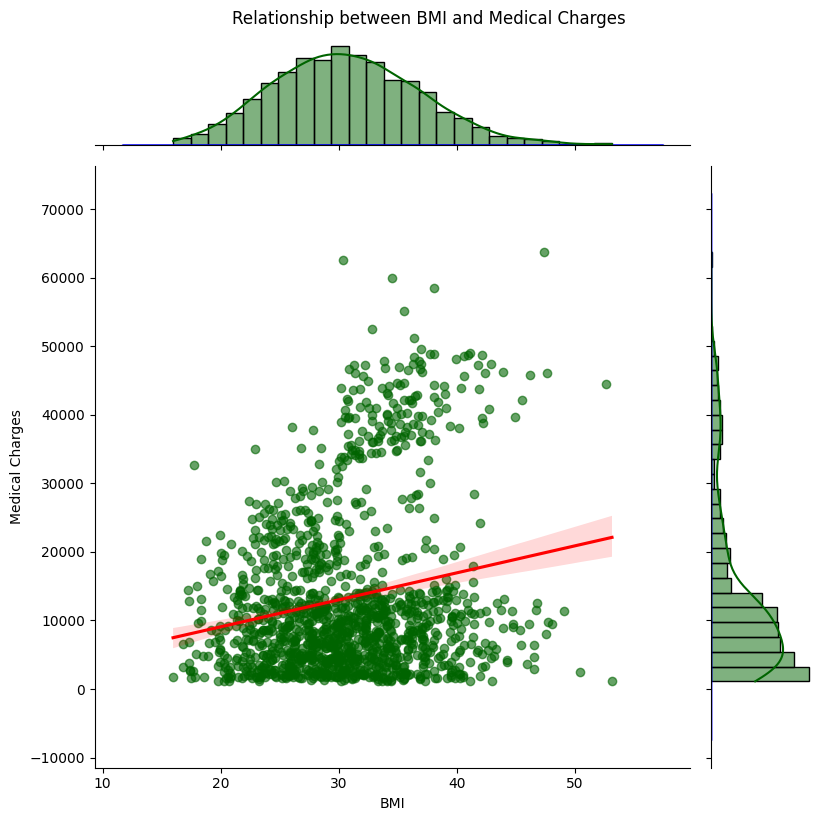

In [122]:

# Calculate the average medical charges based on age
avg_charges_by_bmi = data.groupby("bmi")["charges"].mean().reset_index()


# Using sns.jointplot for a comprehensive view of BMI vs. Charges
# kind='reg' adds a regression line and confidence interval
# kind='kde' would show contour plots of the joint density
# kind='hex' would show a hexagonal binning plot for dense data
# kind='hist' would show 2D histogram
g = sns.jointplot(x="bmi", y="charges", data=data, kind='reg', height=8, color='darkgreen',
                  scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

# You can also add a KDE plot to the marginals for smoother distribution curves
g.plot_marginals(sns.kdeplot, color='blue', fill=True, alpha=0.3)

# Set titles and labels
g.fig.suptitle('Relationship between BMI and Medical Charges', y=1.02) # Adjust y to prevent overlap
g.set_axis_labels('BMI', 'Medical Charges')

# Display the plot
plt.show()

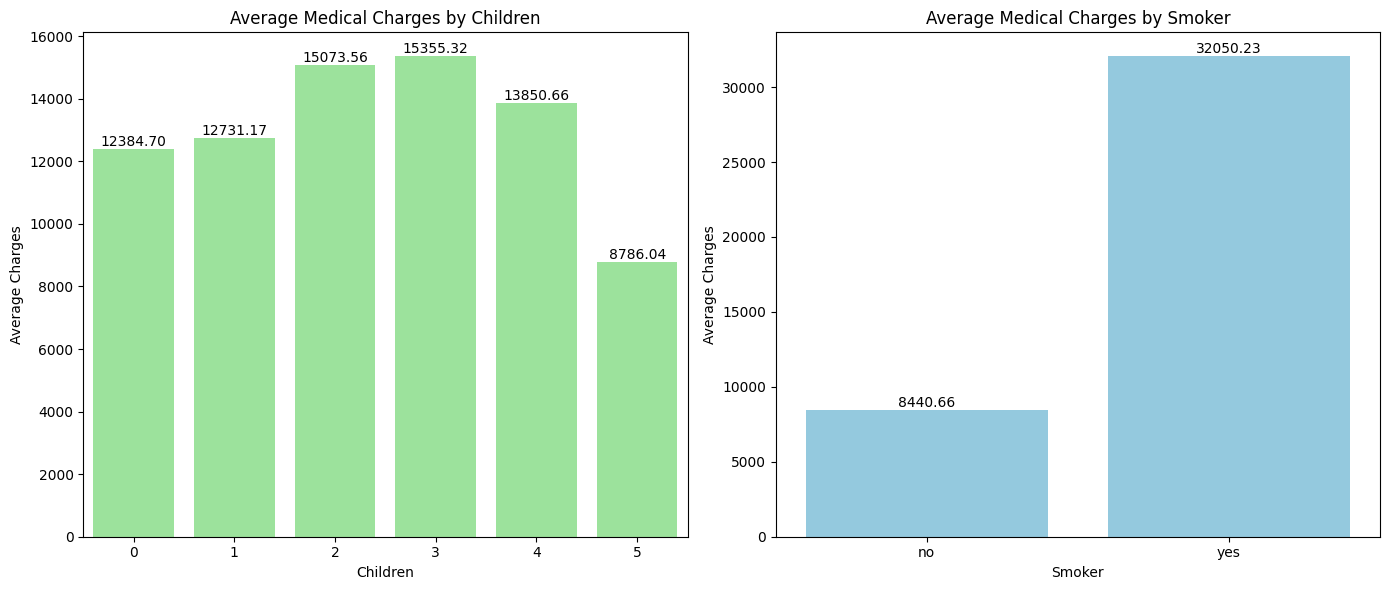

In [123]:
import seaborn as sns

## calucate the average charges based on particular feature
avg_charges_by_children = data.groupby("children")["charges"].mean().reset_index()
avg_charges_by_smoker = data.groupby("smoker")["charges"].mean().reset_index()

# Create subplots: 1 row, 2 columns to accommodate the two remaining plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # Adjusted figsize for 1x2 layout

# Line plot for average charges by sex (left plot)
# Now accessed directly as axes[0] in a single-row subplot
sns.barplot(ax=axes[0], x='children', y='charges', data=avg_charges_by_children, color='lightgreen')
axes[0].set_title('Average Medical Charges by Children')
axes[0].set_xlabel('Children')
axes[0].set_ylabel('Average Charges')

# Add value labels on bars
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f')

# Line plot for average charges by BMI (right plot)
# Now accessed directly as axes[1] in a single-row subplot
sns.barplot(ax=axes[1], x='smoker', y='charges', data=avg_charges_by_smoker, color='skyblue')
axes[1].set_title('Average Medical Charges by Smoker')
axes[1].set_xlabel('Smoker')
axes[1].set_ylabel('Average Charges')

# Add value labels on bars
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f')

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Display the plots
plt.show()


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [125]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010
